<a href="https://colab.research.google.com/github/haalogen/IFA-cloud-nnregressor/blob/master/IFA__LUT__nn_regression__predict_aod_cloudOD_cloudBaseHeight_km.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# @created 2018-12-25
# @author Stanislav Nikitin
# @descr Нейросеть-регрессор для данных LUT (Look Up Table, таблица насчитанных результатов) из ИФА.
# Основана на ноутбуке-шаблоне Tensorflow Basic Regression

* 21/02/2018  Боровский А.Н. 
* Получено с использованием MC C++.
* Таблица связи измеряемых и неизвестных величин в контексте определения параметров облачности из спектральных измерений.
* К измеряемым величинам относятся: интенсивность излучения, индекс цветности, наклонная толща О4, значение линейного члена DOAS-анализа.
* Все они измеряются в видимой и УФ области спектра.
* К неизвестным величинам относятся:  оптические толщины облачности и аэрозоля, нижняя граница облачности, физическая толщина облачности, концентрация частиц в облаке.
* Здесь представлены результаты модельных расчетов, проведенных с различными сценариями облачности и аэрозоля.
* Сценарий облачности: 
*      задавалась нижняя граница облачности, физическая толщина облака и относительная концентрация частиц в облаке.
* Модельное значение интенсивности получено осреднением области +/-5 нм справочного спектра, поправленного с использованием коэффициентов, которые получены в результате расчетов MC C++.
* Хотя здесь приведено по 4 значения наклонных толщ О4 по данным моделирования в видимой и УФ областях спектра, использовать нужно одну из УФ диапазона, и одну из видимого.
*
* 12/02/2019  Боровский А.Н. 
* 
* Отличие от версии 180221:
*    1) в конец таблицы добавлены столбцы значений коэффициентов F (см. описание ниже)
*    2) до 1% уменьшена ошибка значений, соответствующих некоторым (но не всем) сценариям с АОТ=0.12 и большой (12 и выше) оптической толще облачности
* 
* Получено с использованием MC C++.
* 
* Таблица связи измеряемых и неизвестных величин в контексте определения 
*    1) параметров облачности из спектральных измерений;
*    2) коэффициентов пересчёта F: V=S×F, V - содержание примеси в вертикальном столбе, S - измеряемое содержание примеси в наклонном столбе.
* К измеряемым величинам относятся: интенсивность излучения, индекс цветности, наклонная толща О4, значение линейного члена DOAS-анализа.
* Все они измеряются в видимой и УФ области спектра.
* К неизвестным величинам относятся: оптические толщины облачности и аэрозоля, нижняя граница облачности, физическая толщина облачности, концентрация частиц в облаке, коэффициенты F.
* Здесь представлены результаты модельных расчетов, проведенных с различными сценариями облачности и аэрозоля.
* Коэффициенты F получены для двух сценариев формы вертикального распределения примеси: 
*     1) Winter: 90% примеси равномерно перемешано в пограничном слое атмосферы, высота которого 400 м. Выше 400 м концентрация примеси экпоненциально убывает.
*     2) Summer: 90% примеси равномерно перемешано в пограничном слое атмосферы, высота которого 1000 м. Выше 1000 м концентрация примеси экпоненциально убывает.
* Сценарии облачности: 
*      задавалась нижняя граница облачности, физическая толщина облака и относительная концентрация частиц в облаке.
* Модельное значение интенсивности получено осреднением справочного спектра в области +/-5 нм от интересуемой длины волны. Справочный спектр поправлялся с использованием коэффициентов, которые получены в результате расчетов MC C++.
* Хотя здесь приведено по 4 значения наклонных толщ О4 по данным моделирования в видимой и УФ областях спектра, использовать нужно одну из УФ диапазона, и одну из видимого.
*
**********************************************
* albedo - альбедо подстилающей поверхности
* sza_deg - зенитный угол Солнца, градусы
* intensity_345nm - интенсивность солнечного излучения на длине волны 345 нм (Вт×(нм×м2×ср)-1)
* intensity_374nm - интенсивность солнечного излучения на длине волны 374 нм (Вт×(нм×м2×ср)-1)
* intensity_430nm  - интенсивность солнечного излучения на длине волны 430 нм (Вт×(нм×м2×ср)-1)
* intensity_480nm  - интенсивность солнечного излучения на длине волны 480 нм (Вт×(нм×м2×ср)-1)
* intensityError_340nm - ошибка расчетов интенсивности MC C++ 340 нм (левая граница осреднения для получения интенсивности на длине волны 345 нм) (%)
* intensityError_350nm - ошибка расчетов интенсивности MC C++ 350 нм (правая граница осреднения для получения интенсивности на длине волны 345 нм) (%)
* intensityError_369nm - ошибка расчетов интенсивности MC C++ 369 нм (левая граница осреднения для получения интенсивности на длине волны 374 нм) (%)
* intensityError_379nm - ошибка расчетов интенсивности MC C++ 379 нм (правая граница осреднения для получения интенсивности на длине волны 374 нм) (%)
* intensityError_425nm - ошибка расчетов интенсивности MC C++ 425 нм (левая граница осреднения для получения интенсивности на длине волны 430 нм) (%)
* intensityError_435nm - ошибка расчетов интенсивности MC C++ 425 нм (правая граница осреднения для получения интенсивности на длине волны 430 нм) (%)
* intensityError_475nm - ошибка расчетов интенсивности MC C++ 480 нм (левая граница осреднения для получения интенсивности на длине волны 475 нм) (%)
* intensityError_485nm - ошибка расчетов интенсивности MC C++ 485 нм (правая граница осреднения для получения интенсивности на длине волны 475 нм) (%)
* O4SCD_340nm - наклонная толща О4 на длине волны 340 нм (размерность?)
* O4SCD_350nm - наклонная толща О4 на длине волны 350 нм (размерность?)
* O4SCD_369nm - наклонная толща О4 на длине волны 369 нм (размерность?)
* O4SCD_379nm - наклонная толща О4 на длине волны 379 нм (размерность?)
* O4SCD_425nm - наклонная толща О4 на длине волны 425 нм (размерность?)
* O4SCD_435nm - наклонная толща О4 на длине волны 435 нм (размерность?)
* O4SCD_475nm - наклонная толща О4 на длине волны 475 нм (размерность?)
* O4SCD_485nm - наклонная толща О4 на длине волны 485 нм (размерность?)
* ci_uv - индекс цветности УФ диапазона (intensity_374nm / intensity_345nm) (безразмерный)
* ci_vis - индекс цветности видимого диапазона (intensity_480nm / intensity_430nm) (безразмерный)
* pc_uv - линейный член DOAS-анализа в УФ области ( (intensity_374nm - intensity_345nm) / (374nm - 345nm)   )   (Вт×(нм2×м2×ср)-1)
* pc_vis - линейный член DOAS-анализа в видимой области ( (intensity_480nm - intensity_430nm) / (480nm - 430nm)   )   (Вт×(нм2×м2×ср)-1)
* aod - оптическая толщина аэрозоля (безразмерная)
* cloudOD - оптическая толщина облачности (безразмерная)
* cloudBaseHeight_km - высота нижней границы облачности (км)
* cloudThick_km - толщина облака (км)
* relativeCloudConc - относительная концентрация частиц в облаке (безразмерная)
* FSummer_340 - коэффициент F на длине волны 340 нм для Summer-cценария
* FWinter_340 - коэффициент F на длине волны 340 нм для Winter-cценария
* FSummer_350 - коэффициент F на длине волны 350 нм для Summer-cценария
* FWinter_350 - коэффициент F на длине волны 350 нм для Winter-cценария
* FSummer_369 - коэффициент F на длине волны 369 нм для Summer-cценария
* FWinter_369 - коэффициент F на длине волны 369 нм для Winter-cценария
* FSummer_379 - коэффициент F на длине волны 379 нм для Summer-cценария
* FWinter_379 - коэффициент F на длине волны 379 нм для Summer-cценария
* FSummer_425 - коэффициент F на длине волны 425 нм для Winter-cценария
* FWinter_425 - коэффициент F на длине волны 425 нм для Summer-cценария
* FSummer_435 - коэффициент F на длине волны 435 нм для Winter-cценария
* FWinter_435 - коэффициент F на длине волны 435 нм для Summer-cценария
* FSummer_475 - коэффициент F на длине волны 475 нм для Winter-cценария
* FWinter_475 - коэффициент F на длине волны 475 нм для Summer-cценария
* FSummer_485 - коэффициент F на длине волны 485 нм для Summer-cценария
* FWinter_485 - коэффициент F на длине волны 485 нм для Winter-cценария

# Regression: predict fuel efficiency

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [81]:
# Use seaborn for pairplot
!pip install seaborn

In [82]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', 500)
tf.random.set_random_seed(12345678)
print(tf.__version__)

1.13.1


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/).



### Get the data
First download the dataset.

In [0]:
# Скачиваем данные
data_url_v180221 = 'https://gist.githubusercontent.com/haalogen/0ec5e1b7ae515391484d7883ecb9313c/raw/2fafa96369d496214f2b231966bcd2f82f691658/180221_lutData.tsv'
data_url_v190212 = 'https://gist.githubusercontent.com/haalogen/c53f1a2ea432bbe251dbe50c73437d00/raw/32976b13283b5b2f9b68e96c3c766781b5f8b355/190212_lutData.tsv'
raw_dataset = pd.read_csv(data_url_v190212, sep='\t')

Import it using pandas

In [84]:
column_names = raw_dataset.columns
print(column_names)

dataset = raw_dataset.copy()

# Выкинем ненужные данные
dropped_columns = [
  'cloudThick_km', 
  'relativeCloudConc', 
  'intensityError_340nm',
  'intensityError_350nm',
  'intensityError_369nm',
  'intensityError_379nm',
  'intensityError_425nm',
  'intensityError_435nm',
  'intensityError_475nm',
  'intensityError_485nm'
]
dataset = dataset.drop(columns=dropped_columns)
dataset.tail()

Index(['albedo', 'sza_deg', 'intensity_345nm', 'intensity_374nm',
       'intensity_430nm', 'intensity_480nm', 'intensityError_340nm',
       'intensityError_350nm', 'intensityError_369nm', 'intensityError_379nm',
       'intensityError_425nm', 'intensityError_435nm', 'intensityError_475nm',
       'intensityError_485nm', 'O4SCD_340nm', 'O4SCD_350nm', 'O4SCD_369nm',
       'O4SCD_379nm', 'O4SCD_425nm', 'O4SCD_435nm', 'O4SCD_475nm',
       'O4SCD_485nm', 'ci_uv', 'ci_vis', 'pc_uv', 'pc_vis', 'aod', 'cloudOD',
       'cloudBaseHeight_km', 'cloudThick_km', 'relativeCloudConc',
       'FSummer_340', 'FWinter_340', 'FSummer_350', 'FWinter_350',
       'FSummer_369', 'FWinter_369', 'FSummer_379', 'FWinter_379',
       'FSummer_425', 'FWinter_425', 'FSummer_435', 'FWinter_435',
       'FSummer_475', 'FWinter_475', 'FSummer_485', 'FWinter_485'],
      dtype='object')


,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,aod,cloudOD,cloudBaseHeight_km,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
2725,0.34,84,0.076304,0.105087,0.170608,0.231962,2.960000e+24,3.030000e+24,3.130000e+24,3.180000e+24,3.500000e+24,3.560000e+24,3.910000e+24,3.940000e+24,1.377205,1.359621,0.000992,0.001227,1.07,25.6,3.2,0.150491,0.150491,0.151428,0.151428,0.150126,0.150126,0.150930,0.150930,0.142893,0.142893,0.142300,0.142300,0.133084,0.133084,0.133534,0.133534
2726,0.34,84,0.011126,0.018397,0.035423,0.046985,3.770000e+24,4.000000e+24,4.080000e+24,4.130000e+24,4.060000e+24,4.180000e+24,4.470000e+24,4.490000e+24,1.653473,1.326414,0.000251,0.000231,1.07,51.2,0.4,0.107817,0.107817,0.110748,0.110748,0.113075,0.113075,0.116472,0.116472,0.115144,0.115144,0.112117,0.112117,0.106114,0.106114,0.104316,0.104316
2727,0.34,84,0.015148,0.023393,0.034444,0.042046,3.560000e+24,3.650000e+24,3.680000e+24,3.730000e+24,4.200000e+24,4.270000e+24,4.570000e+24,4.620000e+24,1.544299,1.220702,0.000284,0.000152,1.07,51.2,0.8,0.132382,0.132382,0.135068,0.135068,0.131413,0.131413,0.133111,0.133111,0.120569,0.120569,0.118135,0.118135,0.112108,0.112108,0.112628,0.112628
2728,0.34,84,0.020639,0.025644,0.034916,0.041120,3.480000e+24,3.530000e+24,3.550000e+24,3.590000e+24,4.080000e+24,4.120000e+24,4.370000e+24,4.400000e+24,1.242480,1.177680,0.000173,0.000124,1.07,51.2,1.6,0.152002,0.152002,0.151934,0.151934,0.149699,0.149699,0.147884,0.147884,0.123310,0.123310,0.124783,0.124783,0.124182,0.124182,0.122586,0.122586
2729,0.34,84,0.023082,0.033262,0.051372,0.066525,3.240000e+24,3.280000e+24,3.290000e+24,3.290000e+24,3.540000e+24,3.590000e+24,3.790000e+24,3.860000e+24,1.441040,1.294958,0.000351,0.000303,1.07,51.2,3.2,0.157644,0.157644,0.158217,0.158217,0.157332,0.157332,0.156157,0.156157,0.148914,0.148914,0.148285,0.148285,0.144840,0.144840,0.143726,0.143726


### Clean the data

The dataset contains a few unknown values. 

In [0]:
# dataset.isna?

In [86]:
dataset.isna().sum()

albedo                 0
sza_deg                0
intensity_345nm        0
intensity_374nm        0
intensity_430nm        0
intensity_480nm        0
O4SCD_340nm            0
O4SCD_350nm            0
O4SCD_369nm            0
O4SCD_379nm            0
O4SCD_425nm            0
O4SCD_435nm            0
O4SCD_475nm            0
O4SCD_485nm            0
ci_uv                  0
ci_vis                 0
pc_uv                  0
pc_vis                 0
aod                    0
cloudOD               42
cloudBaseHeight_km    42
FSummer_340            0
FWinter_340            0
FSummer_350            0
FWinter_350            0
FSummer_369            0
FWinter_369            0
FSummer_379            0
FWinter_379            0
FSummer_425            0
FWinter_425            0
FSummer_435            0
FWinter_435            0
FSummer_475            0
FWinter_475            0
FSummer_485            0
FWinter_485            0
dtype: int64

To keep this initial tutorial simple drop those rows. 

In [0]:
dataset = dataset.dropna()

The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

In [0]:
# origin = dataset.pop('Origin')

In [0]:
# dataset['USA'] = (origin == 1)*1.0
# dataset['Europe'] = (origin == 2)*1.0
# dataset['Japan'] = (origin == 3)*1.0
# dataset.tail()

In [0]:
# dataset.drop?

### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [0]:
# dataset.sample?

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

In [0]:
# sns.pairplot?

In [94]:
column_names

Index(['albedo', 'sza_deg', 'intensity_345nm', 'intensity_374nm',
       'intensity_430nm', 'intensity_480nm', 'intensityError_340nm',
       'intensityError_350nm', 'intensityError_369nm', 'intensityError_379nm',
       'intensityError_425nm', 'intensityError_435nm', 'intensityError_475nm',
       'intensityError_485nm', 'O4SCD_340nm', 'O4SCD_350nm', 'O4SCD_369nm',
       'O4SCD_379nm', 'O4SCD_425nm', 'O4SCD_435nm', 'O4SCD_475nm',
       'O4SCD_485nm', 'ci_uv', 'ci_vis', 'pc_uv', 'pc_vis', 'aod', 'cloudOD',
       'cloudBaseHeight_km', 'cloudThick_km', 'relativeCloudConc',
       'FSummer_340', 'FWinter_340', 'FSummer_350', 'FWinter_350',
       'FSummer_369', 'FWinter_369', 'FSummer_379', 'FWinter_379',
       'FSummer_425', 'FWinter_425', 'FSummer_435', 'FWinter_435',
       'FSummer_475', 'FWinter_475', 'FSummer_485', 'FWinter_485'],
      dtype='object')

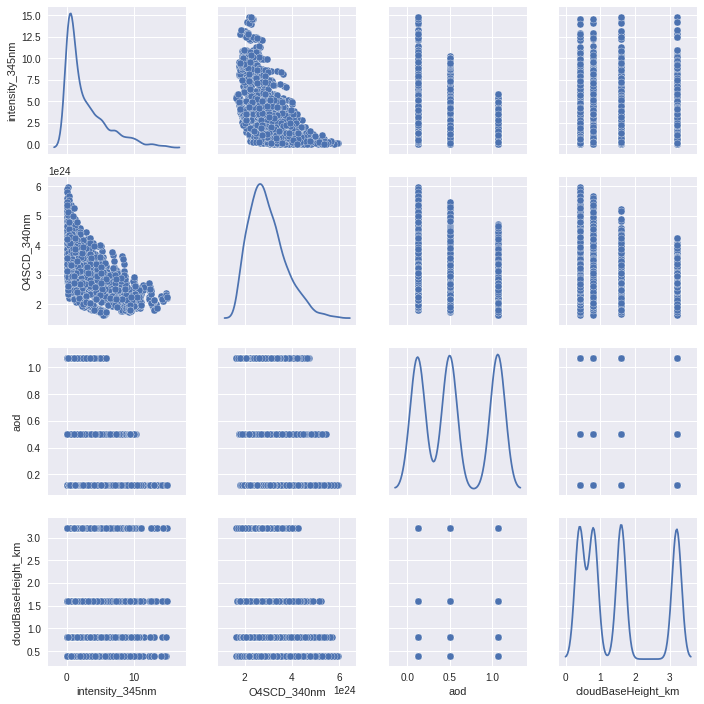

In [95]:
sns.pairplot(train_dataset[["intensity_345nm", "O4SCD_340nm", "aod", "cloudBaseHeight_km"]], diag_kind="kde")

Also look at the overall statistics:

In [96]:
train_stats = train_dataset.describe()
train_stats.pop("aod")
train_stats.pop("cloudOD")
train_stats.pop("cloudBaseHeight_km")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
albedo,2150.0,1.956744e-01,1.450322e-01,5.000000e-02,5.000000e-02,3.400000e-01,3.400000e-01,3.400000e-01
sza_deg,2150.0,5.902791e+01,1.891309e+01,3.000000e+01,4.000000e+01,6.000000e+01,8.000000e+01,8.400000e+01
intensity_345nm,2150.0,2.757267e+00,3.017219e+00,6.610553e-03,4.935814e-01,1.523821e+00,4.118631e+00,1.481136e+01
intensity_374nm,2150.0,3.643770e+00,3.900458e+00,1.019668e-02,6.733787e-01,2.131377e+00,5.577072e+00,1.916173e+01
intensity_430nm,2150.0,5.556622e+00,5.844760e+00,1.654152e-02,1.034177e+00,3.344984e+00,8.686756e+00,2.852181e+01
intensity_480nm,2150.0,7.351100e+00,7.689352e+00,2.028251e-02,1.336998e+00,4.514697e+00,1.156099e+01,3.725046e+01
O4SCD_340nm,2150.0,2.957177e+24,7.583534e+23,1.650000e+24,2.410000e+24,2.840000e+24,3.390000e+24,5.960000e+24
O4SCD_350nm,2150.0,2.967944e+24,7.828176e+23,1.640000e+24,2.400000e+24,2.845000e+24,3.420000e+24,6.060000e+24
O4SCD_369nm,2150.0,2.969447e+24,8.201404e+23,1.610000e+24,2.350000e+24,2.850000e+24,3.460000e+24,6.240000e+24
O4SCD_379nm,2150.0,2.980600e+24,8.474522e+23,1.600000e+24,2.330000e+24,2.860000e+24,3.510000e+24,6.350000e+24


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [0]:
# train_dataset.pop?
# train_dataset.loc?

In [0]:
# train_labels = train_dataset.pop('MPG')
# test_labels = test_dataset.pop('MPG')
estimated_columns = ['aod', 'cloudOD', "cloudBaseHeight_km"]
train_labels = train_dataset.loc[:, estimated_columns]
test_labels = test_dataset.loc[:, estimated_columns]
# Выкинем оцениваемые колонки из наборов данных
train_dataset = train_dataset.drop(columns=estimated_columns)
test_dataset = test_dataset.drop(columns=estimated_columns)

In [99]:
train_dataset.tail()

,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
1200,0.05,60,5.096272,6.577715,9.798815,12.665619,3.070000e+24,3.030000e+24,2.960000e+24,2.920000e+24,2.790000e+24,2.760000e+24,2.670000e+24,2.650000e+24,1.290691,1.292566,0.051084,0.057336,0.164006,0.164006,0.164222,0.164222,0.164569,0.164569,0.164790,0.164790,0.165773,0.165773,0.165910,0.165910,0.166282,0.166282,0.166340,0.166340
343,0.34,30,3.467531,5.077511,9.051393,13.208447,2.050000e+24,2.040000e+24,2.020000e+24,2.010000e+24,1.980000e+24,1.970000e+24,1.960000e+24,1.960000e+24,1.464301,1.459272,0.055517,0.083141,0.145094,0.145094,0.144569,0.144569,0.143552,0.143552,0.142854,0.142854,0.140775,0.140775,0.140355,0.140355,0.137919,0.137919,0.137459,0.137459
47,0.05,30,1.280349,1.663104,2.091276,2.352941,3.880000e+24,3.870000e+24,3.840000e+24,3.810000e+24,3.780000e+24,3.770000e+24,3.750000e+24,3.680000e+24,1.298945,1.125122,0.013198,0.005233,0.160092,0.160092,0.160861,0.160861,0.160936,0.160936,0.161117,0.161117,0.161020,0.161020,0.160397,0.160397,0.160575,0.160575,0.159047,0.159047
759,0.34,40,1.092842,1.481835,2.561870,3.691049,2.730000e+24,2.680000e+24,2.610000e+24,2.580000e+24,2.580000e+24,2.590000e+24,2.630000e+24,2.640000e+24,1.355945,1.440764,0.013414,0.022584,0.154368,0.154368,0.153913,0.153913,0.152212,0.152212,0.151195,0.151195,0.145214,0.145214,0.144581,0.144581,0.140465,0.140465,0.138659,0.138659
2500,0.05,84,0.209858,0.299924,0.484743,0.637005,2.630000e+24,2.700000e+24,2.800000e+24,2.870000e+24,3.170000e+24,3.240000e+24,3.500000e+24,3.560000e+24,1.429175,1.314108,0.003106,0.003045,0.169182,0.169182,0.169457,0.169457,0.169709,0.169709,0.169805,0.169805,0.169980,0.169980,0.169973,0.169973,0.169808,0.169808,0.169803,0.169803


In [100]:
train_labels.tail()

,aod,cloudOD,cloudBaseHeight_km
1200,0.12,3.2,0.8
343,1.07,6.4,0.8
47,0.12,51.2,1.6
759,1.07,25.6,3.2
2500,1.07,3.2,0.8


In [101]:
test_dataset.tail()

,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
2707,0.34,84,0.043127,0.063405,0.099365,0.131197,3.670000e+24,3.740000e+24,3.830000e+24,3.900000e+24,4.310000e+24,4.370000e+24,4.670000e+24,4.750000e+24,1.470191,1.320357,0.000699,0.000637,0.136175,0.136175,0.134413,0.134413,0.132489,0.132489,0.131223,0.131223,0.129516,0.129516,0.128882,0.128882,0.124986,0.124986,0.124069,0.124069
2711,0.34,84,0.009043,0.013368,0.023987,0.036958,4.570000e+24,4.700000e+24,4.820000e+24,4.930000e+24,5.180000e+24,5.210000e+24,6.010000e+24,6.290000e+24,1.478335,1.540756,0.000149,0.000259,0.133540,0.133540,0.132578,0.132578,0.132633,0.132633,0.130780,0.130780,0.133134,0.133134,0.133587,0.133587,0.133051,0.133051,0.135302,0.135302
2713,0.34,84,0.017183,0.024383,0.029902,0.030611,3.700000e+24,3.700000e+24,3.750000e+24,3.810000e+24,3.980000e+24,3.990000e+24,4.150000e+24,4.170000e+24,1.418967,1.023734,0.000248,0.000014,0.154283,0.154283,0.156901,0.156901,0.154005,0.154005,0.151646,0.151646,0.144218,0.144218,0.139950,0.139950,0.123104,0.123104,0.123863,0.123863
2716,0.34,84,0.178325,0.256527,0.416128,0.548548,2.770000e+24,2.840000e+24,2.950000e+24,3.010000e+24,3.300000e+24,3.370000e+24,3.630000e+24,3.690000e+24,1.438531,1.318219,0.002697,0.002648,0.146212,0.146212,0.145782,0.145782,0.144972,0.144972,0.144392,0.144392,0.141718,0.141718,0.141172,0.141172,0.138838,0.138838,0.138346,0.138346
2725,0.34,84,0.076304,0.105087,0.170608,0.231962,2.960000e+24,3.030000e+24,3.130000e+24,3.180000e+24,3.500000e+24,3.560000e+24,3.910000e+24,3.940000e+24,1.377205,1.359621,0.000992,0.001227,0.150491,0.150491,0.151428,0.151428,0.150126,0.150126,0.150930,0.150930,0.142893,0.142893,0.142300,0.142300,0.133084,0.133084,0.133534,0.133534


In [102]:
test_labels.tail()

,aod,cloudOD,cloudBaseHeight_km
2707,1.07,25.6,0.8
2711,1.07,51.2,0.8
2713,1.07,51.2,3.2
2716,1.07,6.4,1.6
2725,1.07,25.6,3.2


### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input. 

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [104]:
normed_train_data.tail()

,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
1200,-1.004428,0.051398,0.775219,0.752205,0.725811,0.691153,0.148774,0.079272,-0.011518,-0.071508,-0.251029,-0.284236,-0.385535,-0.402887,-0.840192,-0.222185,0.656195,0.568056,0.718662,0.718662,0.728006,0.728006,0.746226,0.746226,0.758001,0.758001,0.814630,0.814630,0.822686,0.822686,0.853172,0.853172,0.857392,0.857392
343,0.995128,-1.534805,0.235404,0.367583,0.597932,0.761748,-1.196245,-1.185390,-1.157663,-1.145315,-1.076431,-1.067429,-1.014276,-0.999281,1.377576,1.566819,0.797966,1.251555,-0.029883,-0.029883,-0.047593,-0.047593,-0.081105,-0.081105,-0.103122,-0.103122,-0.145074,-0.145074,-0.156102,-0.156102,-0.211919,-0.211919,-0.222995,-0.222995
47,-1.004428,-1.534805,-0.489496,-0.507803,-0.592898,-0.650011,1.216878,1.152319,1.061469,0.978698,0.757797,0.717060,0.570858,0.487383,-0.734753,-2.019115,-0.555614,-0.811995,0.563760,0.563760,0.595374,0.595374,0.603239,0.603239,0.613822,0.613822,0.632144,0.632144,0.611521,0.611521,0.638836,0.638836,0.584578,0.584578
759,0.995128,-1.006071,-0.551642,-0.554277,-0.512382,-0.475990,-0.299566,-0.367830,-0.438274,-0.472711,-0.465022,-0.452771,-0.420957,-0.411530,-0.006609,1.368193,-0.548734,-0.352437,0.337195,0.337195,0.321165,0.321165,0.259774,0.259774,0.224311,0.224311,0.025336,0.025336,0.005751,0.005751,-0.116330,-0.116330,-0.178083,-0.178083
2500,-1.004428,1.320360,-0.844290,-0.857296,-0.867765,-0.873168,-0.431430,-0.342282,-0.206607,-0.130509,0.136197,0.191627,0.349471,0.383662,0.928858,0.008992,-0.878438,-0.869950,0.923536,0.923536,0.934599,0.934599,0.948569,0.948569,0.954878,0.954878,0.976156,0.976156,0.978283,0.978283,0.985557,0.985557,0.986901,0.986901


In [105]:
normed_test_data.tail()

,albedo,sza_deg,intensity_345nm,intensity_374nm,intensity_430nm,intensity_480nm,O4SCD_340nm,O4SCD_350nm,O4SCD_369nm,O4SCD_379nm,O4SCD_425nm,O4SCD_435nm,O4SCD_475nm,O4SCD_485nm,ci_uv,ci_vis,pc_uv,pc_vis,FSummer_340,FWinter_340,FSummer_350,FWinter_350,FSummer_369,FWinter_369,FSummer_379,FWinter_379,FSummer_425,FWinter_425,FSummer_435,FWinter_435,FSummer_475,FWinter_475,FSummer_485,FWinter_485
2707,0.995128,1.32036,-0.899550,-0.917935,-0.933701,-0.938948,0.939962,0.986252,1.049276,1.084899,1.297875,1.311890,1.385564,1.412227,1.452811,0.076046,-0.955411,-0.933747,-0.382922,-0.382922,-0.448403,-0.448403,-0.516640,-0.516640,-0.559685,-0.559685,-0.577312,-0.577312,-0.595529,-0.595529,-0.697606,-0.697606,-0.723853,-0.723853
2711,0.995128,1.32036,-0.910847,-0.930763,-0.946597,-0.951204,2.126744,2.212592,2.256386,2.300307,2.184418,2.144652,2.572201,2.743310,1.556846,2.441263,-0.973006,-0.943738,-0.487225,-0.487225,-0.520809,-0.520809,-0.510956,-0.510956,-0.577096,-0.577096,-0.438417,-0.438417,-0.415332,-0.415332,-0.394733,-0.394733,-0.303663,-0.303663
2713,0.995128,1.32036,-0.908149,-0.927939,-0.945586,-0.952029,0.979521,0.935155,0.951732,0.978698,0.961600,0.935165,0.925078,0.910910,0.798459,-3.107156,-0.969837,-0.950234,0.333837,0.333837,0.439092,0.439092,0.330367,0.330367,0.242035,0.242035,-0.012897,-0.012897,-0.171618,-0.171618,-0.768248,-0.768248,-0.731574,-0.731574
2716,0.995128,1.32036,-0.854741,-0.868422,-0.879505,-0.884672,-0.246820,-0.163441,-0.023711,0.034692,0.268669,0.320507,0.464592,0.496027,1.048381,0.053109,-0.891524,-0.880461,0.014372,0.014372,0.000291,0.000291,-0.025236,-0.025236,-0.042732,-0.042732,-0.108861,-0.108861,-0.124803,-0.124803,-0.177429,-0.177429,-0.189819,-0.189819
2725,0.995128,1.32036,-0.888554,-0.907248,-0.921512,-0.925844,0.003723,0.079272,0.195763,0.235294,0.472472,0.508870,0.712546,0.712112,0.264969,0.497406,-0.946031,-0.918108,0.183744,0.183744,0.223087,0.223087,0.177659,0.177659,0.213919,0.213919,-0.063768,-0.063768,-0.081608,-0.081608,-0.393500,-0.393500,-0.369809,-0.369809


This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [0]:
# tf.train.RMSPropOptimizer?

In [107]:
train_dataset.keys()

Index(['albedo', 'sza_deg', 'intensity_345nm', 'intensity_374nm',
       'intensity_430nm', 'intensity_480nm', 'O4SCD_340nm', 'O4SCD_350nm',
       'O4SCD_369nm', 'O4SCD_379nm', 'O4SCD_425nm', 'O4SCD_435nm',
       'O4SCD_475nm', 'O4SCD_485nm', 'ci_uv', 'ci_vis', 'pc_uv', 'pc_vis',
       'FSummer_340', 'FWinter_340', 'FSummer_350', 'FWinter_350',
       'FSummer_369', 'FWinter_369', 'FSummer_379', 'FWinter_379',
       'FSummer_425', 'FWinter_425', 'FSummer_435', 'FWinter_435',
       'FSummer_475', 'FWinter_475', 'FSummer_485', 'FWinter_485'],
      dtype='object')

In [0]:
# tf.train.AdamOptimizer?
# layers.Dense?

In [0]:
def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation=tf.nn.relu, 
#                  kernel_regularizer=keras.regularizers.l1_l2(l1=0, l2=0), 
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(3)
  ])

#   optimizer = tf.train.RMSPropOptimizer(0.001)
  optimizer = tf.train.AdamOptimizer()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [0]:
# model.summary?
# model.compile?

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2240      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [139]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.07824387,  0.46246406,  0.16161494],
       [ 0.13107035,  0.26529488, -0.26676625],
       [-0.89522815, -0.09912956, -0.4101264 ],
       [-0.27131525,  0.64890957,  0.06505342],
       [-1.1130974 , -0.89734036,  0.5528608 ],
       [-1.1838715 , -0.64863735, -0.12568185],
       [-0.15449852,  0.80829126, -0.3553534 ],
       [-0.6358159 , -0.12344853, -0.1002968 ],
       [-0.3259823 , -0.83193994,  2.0736327 ],
       [-0.9131665 ,  0.00690754, -0.20518088]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [0]:
# model.fit?

In [141]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()], shuffle=False)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [0]:
# history.history.keys()

In [143]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.426242,0.616300,1.426242,3.250442,0.807323,3.250442,995
996,1.425409,0.616356,1.425409,3.232161,0.806503,3.232161,996
997,1.422159,0.615514,1.422159,3.234402,0.806434,3.234402,997
998,1.420081,0.615072,1.420081,3.229579,0.806117,3.229579,998
999,1.419305,0.615317,1.419305,3.229425,0.805437,3.229425,999


In [0]:
# Save history to file
hist.to_csv(index=False, path_or_buf='history.csv', header=hist.columns)

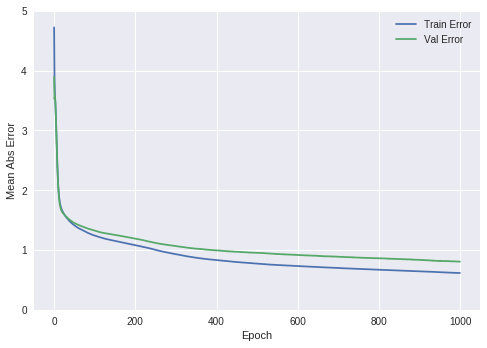

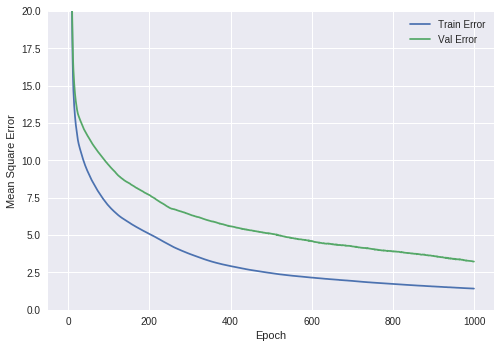

In [145]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,20])

plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [0]:
# keras.callbacks.EarlyStopping?

In [0]:
# model = build_model()

# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history)

The graph shows that on the validation set, the average error usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [148]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
print("Testing set Mean Squared Error: {:5.2f} ".format(mse))

Testing set Mean Abs Error:  0.84 
Testing set Mean Squared Error:  3.12 


### Make predictions

Finally, predict MPG values using data in the testing set:

In [149]:
# test_predictions = model.predict(normed_test_data).flatten()
test_predictions = model.predict(normed_test_data)
test_predictions[-5:]

array([[ 0.9539504 , 31.255577  ,  1.0142674 ],
       [ 0.8015985 , 40.625496  ,  0.5277202 ],
       [ 0.85634816, 49.216972  ,  2.9783957 ],
       [ 1.098296  ,  6.1117597 ,  0.9396236 ],
       [ 1.2315542 , 23.560123  ,  1.8906255 ]], dtype=float32)

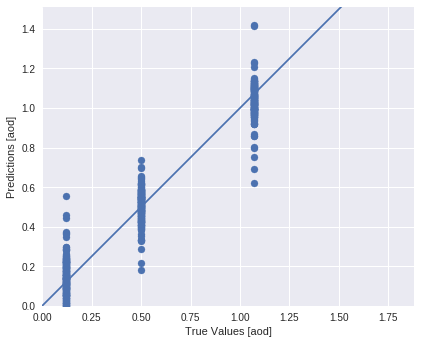

In [150]:
plt.scatter(test_labels['aod'], test_predictions[:, 0])
plt.xlabel('True Values [aod]')
plt.ylabel('Predictions [aod]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [151]:
mse_aod = sum((test_labels['aod'] - test_predictions[:, 0])**2) / len(test_labels['aod'])
print('mse_aod:', mse_aod)

mse_aod: 0.008975998583542586


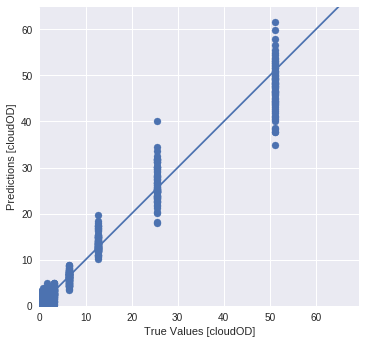

In [152]:
plt.scatter(test_labels['cloudOD'], test_predictions[:, 1])
plt.xlabel('True Values [cloudOD]')
plt.ylabel('Predictions [cloudOD]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [153]:
mse_cloudOD = sum((test_labels['cloudOD'] - test_predictions[:, 1])**2) / len(test_labels['aod'])
print('mse_cloudOD:', mse_cloudOD)

mse_cloudOD: 8.749621338673524


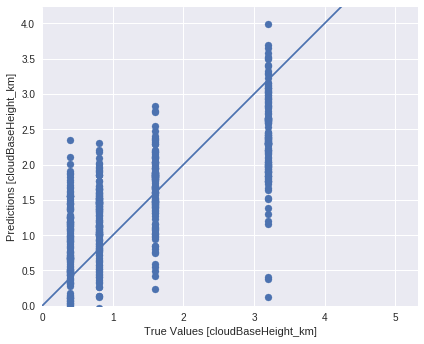

In [154]:
plt.scatter(test_labels['cloudBaseHeight_km'], test_predictions[:, 2])
plt.xlabel('True Values [cloudBaseHeight_km]')
plt.ylabel('Predictions [cloudBaseHeight_km]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [155]:
mse_cloudBaseHeight_km = sum((test_labels['cloudBaseHeight_km'] - test_predictions[:, 2])**2) / len(test_labels['cloudBaseHeight_km'])
print('mse_cloudBaseHeight_km:', mse_cloudBaseHeight_km)

mse_cloudBaseHeight_km: 0.6131742649953339


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

In [156]:
test_labels.tail()

,aod,cloudOD,cloudBaseHeight_km
2707,1.07,25.6,0.8
2711,1.07,51.2,0.8
2713,1.07,51.2,3.2
2716,1.07,6.4,1.6
2725,1.07,25.6,3.2


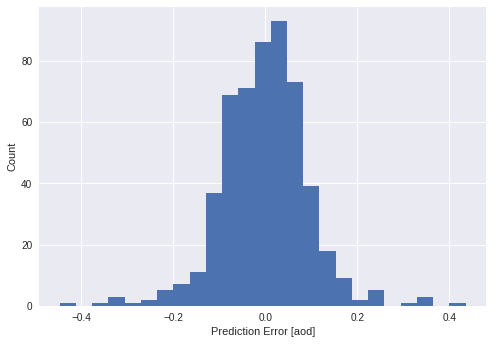

In [157]:
error_aod = test_predictions[:, 0] - test_labels['aod']
plt.hist(error_aod, bins = 25)
plt.xlabel("Prediction Error [aod]")
_ = plt.ylabel("Count")

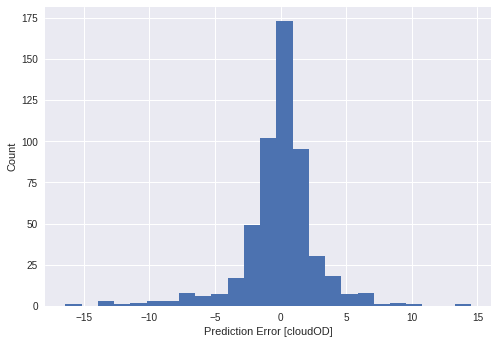

In [158]:
error_cloudOD = test_predictions[:, 1] - test_labels['cloudOD']
plt.hist(error_cloudOD, bins = 25)
plt.xlabel("Prediction Error [cloudOD]")
_ = plt.ylabel("Count")

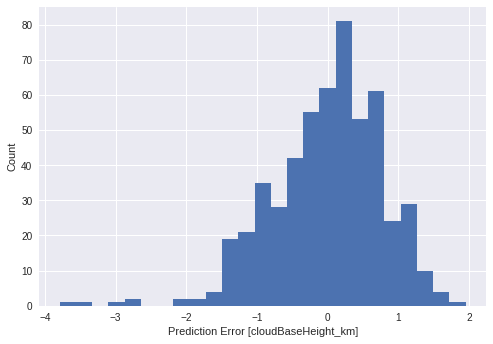

In [159]:
error_cloudOD = test_predictions[:, 2] - test_labels['cloudBaseHeight_km']
plt.hist(error_cloudOD, bins = 25)
plt.xlabel("Prediction Error [cloudBaseHeight_km]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.